In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('car data.csv')

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [25]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [26]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [27]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [28]:
df.shape

(301, 9)

In [29]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [30]:
df.duplicated().sum()

2

In [31]:
df=df.drop_duplicates(keep='first')

In [32]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Transmission']= label_encoder.fit_transform(df['Transmission'])

In [33]:
df['Seller_Type']= label_encoder.fit_transform(df['Seller_Type'])

In [34]:
df['Fuel_Type']= label_encoder.fit_transform(df['Fuel_Type'])

In [41]:
df.drop(columns='Car_Name',axis=1,inplace=True)

KeyError: ignored

In [42]:
X=df.drop(columns=['Selling_Price'],axis=1)

In [43]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [44]:
Y=df['Selling_Price']

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    int64  
 4   Fuel_Type      299 non-null    int64  
 5   Seller_Type    299 non-null    int64  
 6   Transmission   299 non-null    int64  
 7   Owner          299 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 21.0 KB


In [47]:
df['current_year']=2023

In [48]:
df['no_of_year']=df['current_year']-df['Year']

In [49]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_year
0,2014,3.35,5.59,27000,2,0,1,0,2023,9
1,2013,4.75,9.54,43000,1,0,1,0,2023,10
2,2017,7.25,9.85,6900,2,0,1,0,2023,6
3,2011,2.85,4.15,5200,2,0,1,0,2023,12
4,2014,4.60,6.87,42450,1,0,1,0,2023,9


In [51]:
df.drop(columns=['Year','current_year'],axis=1,inplace=True)

In [52]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


<Axes: >

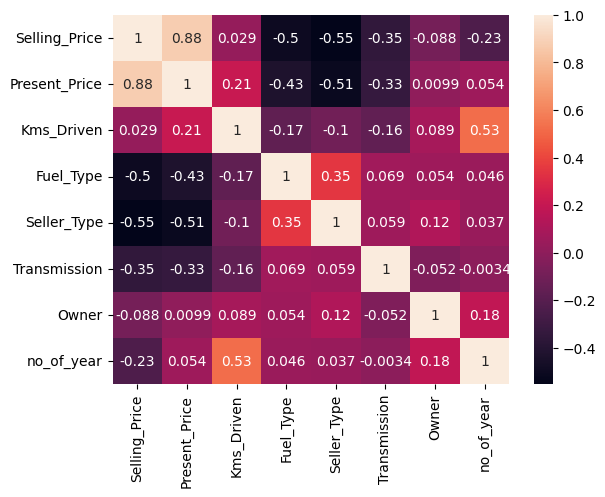

In [53]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='no_of_year', ylabel='Selling_Price'>

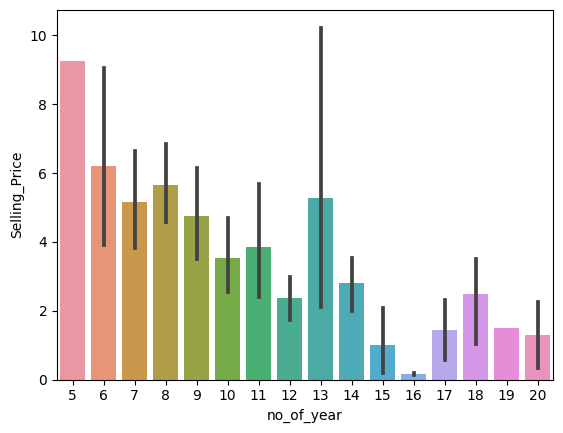

In [54]:
sns.barplot(y='Selling_Price',x='no_of_year',data=df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  299 non-null    float64
 1   Present_Price  299 non-null    float64
 2   Kms_Driven     299 non-null    int64  
 3   Fuel_Type      299 non-null    int64  
 4   Seller_Type    299 non-null    int64  
 5   Transmission   299 non-null    int64  
 6   Owner          299 non-null    int64  
 7   no_of_year     299 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 21.0 KB


In [57]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [58]:
print(model.feature_importances_)

[0.40365395 0.04035433 0.140401   0.26039616 0.07678884 0.00074737
 0.07765835]


In [59]:
rank=pd.Series(model.feature_importances_,index=X.columns)

<Axes: >

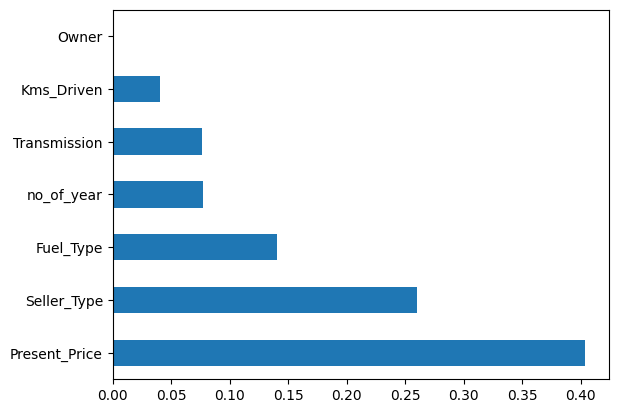

In [60]:
rank.nlargest(10).plot(kind='barh')

In [61]:
X.drop(columns=['Owner','Kms_Driven'],axis=1,inplace=True)

<ipython-input-61-a69beb4911a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Owner','Kms_Driven'],axis=1,inplace=True)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [67]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [69]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model to training data
model.fit(X_train, Y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate R2 score, MAE, and MSE
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)


R2 score: 0.8677633507625937
MAE: 0.7742516256613761
MSE: 2.8729831076676926


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize model
model = DecisionTreeRegressor(random_state=42)

# Fit model to training data
model.fit(X_train, Y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate R2 score, MAE, and MSE
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)


R2 score: 0.8283455598889535
MAE: 0.9297037037037037
MSE: 3.729376913580247


In [71]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit model to training data
model.fit(X_train, Y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate R2 score, MAE, and MSE
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)


R2 score: 0.8779582674825954
MAE: 0.7598917115396925
MSE: 2.65148760177311
